<h1>About This Project</h1>

<p>
In this project, our group will explore the affects of three (3) different models and their effect on classificaiton: Softmax Regression, Support Vector Machine, and Random forest. After exploring the possible hyperparameters for each, we will choose the best and combine them to create an ensemble and analyze its performance against the individial models.

For these models, we will be working with a rock dataset where we by trying to predict the label "rock type" (i.e. igneous = 1, metamorphic = 2, and sedimentary = 3). The dataset contains describing attributes for each, such as texture, stripes, etc.

Lastly, we will compute the accuracy of Human Classification of the rock to the accuracy of our model. We will perform an analyses on the correlation between our model probabilities, and the average human accuracies.
</p>

<p><strong>Group Members</strong>: Peter Heile, Akanksha Khurd, and Anshika Bajpai</p>
<p><strong>Dataset:</strong> <a href = "https://osf.io/cvwu9/wiki/Data%20File%20Descriptions/">Click Here for Dataset</a></p>

<h2>Pt. 1.1: Getting Our Dataset</h2>

In [109]:
import pandas as pd

#Get the dataset features
dataset_features_filepath = r".\Dataset\feature_presence540.txt"
#dataset_features_filepath = r"./Dataset/feature_presence540.txt"
df_all_features = pd.read_csv(dataset_features_filepath, delimiter='\s+', header = None)

#get the dataset labels: igneous = 1, metamorphic = 2, and sedimentary = 3
dataset_labels_filepath = r'.\Dataset\aggregateRockData.xlsx'
#dataset_labels_filepath = r'./Dataset/aggregateRockData.xlsx'
df_all_labels = pd.read_excel(dataset_labels_filepath, header = None)

#Per the directions, we only want to use the first 480 instances, and columns 4-14 inclusive as attributes
df_features = df_all_features.iloc[0:480, 3:14]
print(f"\nFeatures Loaded Successfuly: {df_features.shape == (480, 11)}")
print(f"Features Count: {df_features.shape[1]}, Instance Count: {df_features.shape[0]}")

#Per the directions, we only want to use the first 480 instances, this means labels also
df_labels = df_all_labels.loc[0:479, [1]]
print(f"\nLabels Loaded Successfuly: {df_labels.shape == (480, 1)}")
print(f"Labels Count: {df_labels.shape[1]}, Instance Count: {df_features.shape[0]}")

#combine into one dataset to start for analysis
df_data = pd.concat([df_labels, df_features], axis=1)
print(f"\nLabels and Attributes Concatinated Successfully: {df_labels.shape[0] == df_features.shape[0]}")

#Add column names to help our viewing and analysis
df_data_names = ['Category number', 'Angular fragments', 'Rounded fragments', 'Straight stripes', 
                'Curved stripes', 'Physical layers', 'Veins', 'Oily/shimmery texture',
                'Splotchy texture', 'Single translucent crystal','Multiple cubic crystals', 'Sandy texture']
df_data.columns = df_data_names



Features Loaded Successfuly: True
Features Count: 11, Instance Count: 480

Labels Loaded Successfuly: True
Labels Count: 1, Instance Count: 480

Labels and Attributes Concatinated Successfully: True


In [110]:
#Preview of the dataset and basic information
print("\nDataset Preview: ")
df_data.head()


Dataset Preview: 


,Category number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [111]:
#Print the data info (such as data types)
print("Dataset Basic Information: \n")
df_data.info()

Dataset Basic Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             480 non-null    int64  
 1   Angular fragments           480 non-null    object 
 2   Rounded fragments           480 non-null    object 
 3   Straight stripes            480 non-null    object 
 4   Curved stripes              480 non-null    float64
 5   Physical layers             480 non-null    float64
 6   Veins                       480 non-null    float64
 7   Oily/shimmery texture       480 non-null    float64
 8   Splotchy texture            480 non-null    float64
 9   Single translucent crystal  480 non-null    float64
 10  Multiple cubic crystals     480 non-null    float64
 11  Sandy texture               480 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 45.1+ KB


In [112]:
#We can see that we will need to need to convert the objects features to values to perform model calulcations
#Convert to values and show updates dataset
df_data['Angular fragments'] = pd.to_numeric(df_data['Angular fragments'], errors='coerce')
df_data['Rounded fragments'] = pd.to_numeric(df_data['Rounded fragments'], errors='coerce')
df_data['Straight stripes'] = pd.to_numeric(df_data['Straight stripes'], errors='coerce')

print("Adjusted Dataset Information: \n")
df_data.info()

Adjusted Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             480 non-null    int64  
 1   Angular fragments           480 non-null    float64
 2   Rounded fragments           480 non-null    float64
 3   Straight stripes            480 non-null    float64
 4   Curved stripes              480 non-null    float64
 5   Physical layers             480 non-null    float64
 6   Veins                       480 non-null    float64
 7   Oily/shimmery texture       480 non-null    float64
 8   Splotchy texture            480 non-null    float64
 9   Single translucent crystal  480 non-null    float64
 10  Multiple cubic crystals     480 non-null    float64
 11  Sandy texture               480 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 45.1 KB


<h2>Pt. 1.2: Data Distributions</h2>

In [113]:
#now we want to do some basic data analysis and view destributions
#We start by viewing the statistical Values for the each of the attributes
df_data.describe()

,Category number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


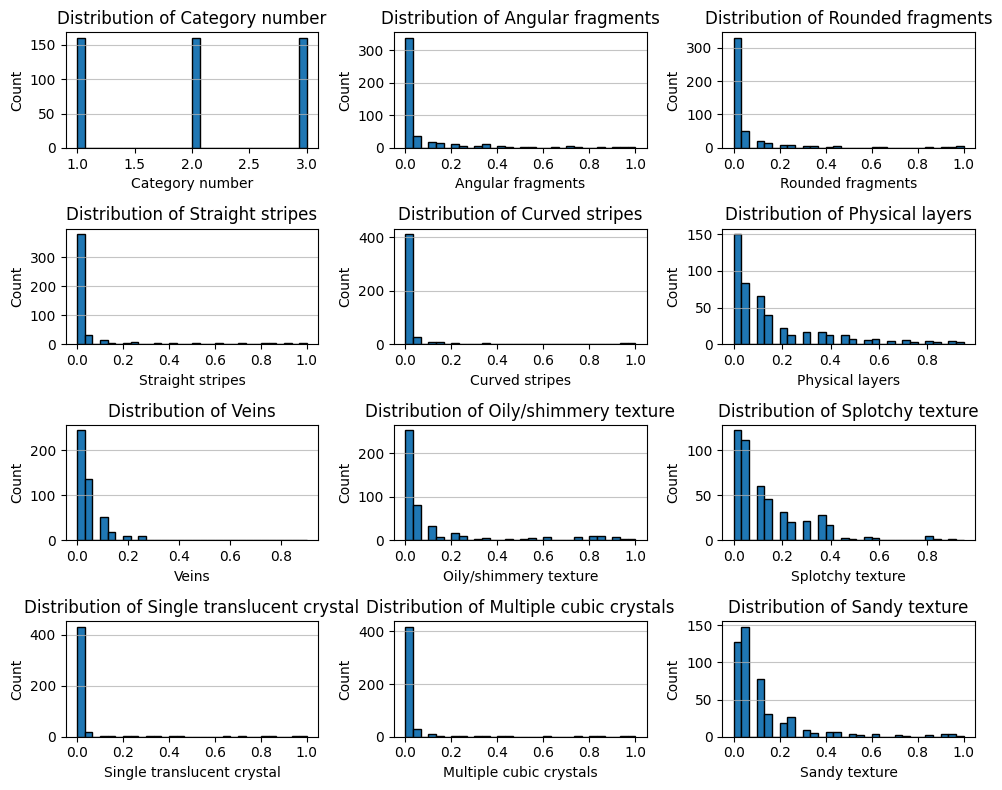

In [114]:
#Now we want to view the distibutions of ecah attribute and our label
import matplotlib.pyplot as plt

columns = df_data.columns

#create a grid for each plot
fig, axes = plt.subplots(len(columns)//3, 3, figsize=(10, 8))
axes = axes.flatten()

#plot the histogram distribution of each attribute and the label
for i, column in enumerate(columns):
    axes[i].hist(df_data[column], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

<h3>Pt. 1 Analysis:</h3>

<p>
    <strong>Dataset Breakdown:<br></strong>
    <p>
        Our Dataset Consists of 480 instances. There are a total of 11 features that we will use in this order, each of which are continuous values.
        Their names are: Angular fragments, Rounded fragments, Straight stripes, Curved stripes, Physical layers, Veins, Oily or shimmery texture, Splotchy texture, Single translucent crystal, Multiple cubic crystals, Sandy texture.<br><br>
        We have 1 label to predict, named "Category number." We temporarily add this as the first feature of our dataset for our future data analyses. Cateogry number is a class (1,2, or 3), it is not continious.
    </p>
    <strong>Statistical Values:<br></strong>
    <p>
        All of our means for each attribute (except the label) are very close to zero, withing .2. The standard deviation follows the same trend, and 75% of the data ends up between 0 and .25 across each. This is very different from a normal distribution that we all know and love.
    </p>
    <strong>Distributions:<br></strong>
    <p>
        Each of the distributions plotted more or less lie between the values of 0 and 1 meaning we likely do not need to normalize or standarize our data to prevent model bias. Each distribution of features also follows the same trend: many, many, many zero or close to zero values and then few instances with larger values close to 1.0.<br><br>
        For this, there is a concern that the zeros are just invalid data; however, we will continue forth acting as though they are true values. This also means however, that all of our means and distributions are extremely skewed towards zero, making any data analysis difficult in the future. 
        <br><br>
        One significant aspect to note, is the distribution of our label is exactly the same for each rock type, so we do not need to worry about one class affecting and biasing our model more that others (which we may need to check again when we split our data insto training and validation)
    </p>
</p>

<h2>Pt. 2: Data Relationships</h2>

In [115]:
#now we are going to be finding the relationships between our data and the label ("Category Number")
#to do this, we can use Pearson Correlation Coefficient to find linear relationships

# Compute the pearson correlation for each label
df_pcc_matrix = df_data.corr(method='pearson')

#This gets the list of feature relationships to our label ("category Number")
pcc_category_number = df_pcc_matrix['Category number']

print(f"Pearson Correlation Coefficients to Label: \n")
print(pcc_category_number)

Pearson Correlation Coefficients to Label: 

Category number               1.000000
Angular fragments            -0.122447
Rounded fragments             0.017446
Straight stripes              0.077495
Curved stripes               -0.017454
Physical layers               0.266699
Veins                         0.140553
Oily/shimmery texture         0.008172
Splotchy texture             -0.229273
Single translucent crystal    0.258910
Multiple cubic crystals       0.113872
Sandy texture                 0.139845
Name: Category number, dtype: float64


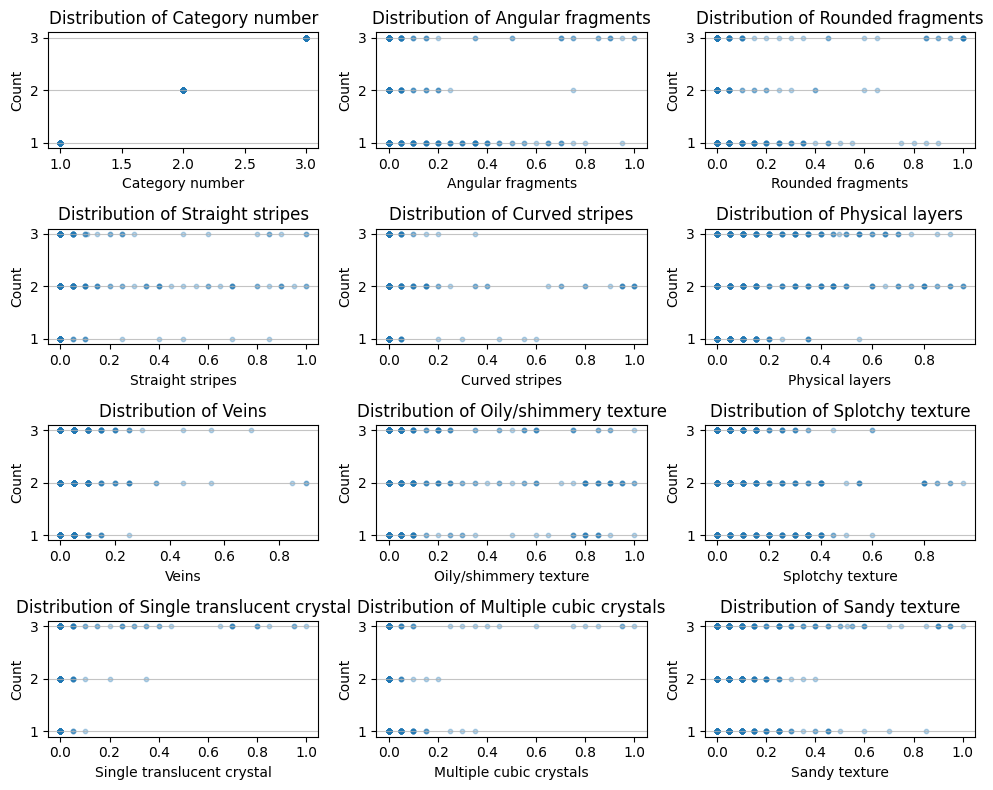

In [116]:
#Although we can tell linear relationships witht he PCC values, it also helps to visualize so we understand better
#Here we will plot each instance value relative to our prediction label to help find linear relationships

columns = df_data.columns

#create a grid for each plot
fig, axes = plt.subplots(len(columns)//3, 3, figsize=(10, 8))
axes = axes.flatten()


#plot the histogram distribution of each attribute and the label
for i, column in enumerate(columns):
    axes[i].scatter(df_data[column], df_data['Category number'], alpha=0.3, s=10)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

<h3>Pt. 2: Analysis</h3>

<p>
    <strong>Pearson Correlations:<br></strong>
    <p>
        Both the plots and the list of our pearson correlations show the same findings and validate our concerns. All of the Pearson Correlation Values against our label are close to zero. We hypothesize this is not truly the case, it just appears so because the mean, std, etc are all skewed towards zero, making the PCC value also skewed towards zero. <br><br>
        Looking at the graphs, it is hard to determine any linear correlation visually; however, there do to be some form of non-linear (and maybe linear) correlations considering that each graph does not appear random.
    </p>
</p>

<h2>Pt. 3: Data Splitting</h3>

In [117]:
#How we will split our data depends on token numbers, which is one of the features from the original dataset
#I did not retreive it as a feature to analyze because it won't be used for any other purpose than splitting

#get the Token numbers and add it to the dataset for splitting
df_split_tokens = df_all_features.iloc[0:480, 2:3]
df_split_tokens.columns = ['Token number']
df_data_with_tokens = pd.concat([df_split_tokens, df_data], axis=1)

#It needs to be converted from an object data type into a numberical datatype
df_data_with_tokens['Token number'] = pd.to_numeric(df_data_with_tokens['Token number'], errors='coerce')

#shuffle the data for training in case needed
df_data_with_tokens = df_data_with_tokens.sample(frac = 1).reset_index(drop = True)

#NOTE: for each, I get rid of the token number attribute because it will not be used for training
#Tokens 1-10 are train instances. 
train = df_data_with_tokens[df_data_with_tokens['Token number'].between(1, 10)].iloc[:, 1:]
print(f"Training Data Shape: {train.shape}")

#Token number 11-13 are validation
val = df_data_with_tokens[df_data_with_tokens['Token number'].between(11, 13)].iloc[:, 1:]
print(f"Validation Data Shape: {val.shape}")

#token number 14-16 are testing
test = df_data_with_tokens[df_data_with_tokens['Token number'].between(14, 16)].iloc[:, 1:]
print(f"Testing Data Shape: {test.shape}")

Training Data Shape: (300, 12)
Validation Data Shape: (90, 12)
Testing Data Shape: (90, 12)


In [118]:
#now that we have each train, val, and test set we split it into label and features
#I also want them as numpy arrays now

#training predictors and labels
X_train, y_train = train.iloc[:, 1:].to_numpy(), train.iloc[:, 0:1].to_numpy()
print(f"\nTraining Feature Shape: {X_train.shape}\nTraining Lables Shape: {y_train.shape}")

#testing predictors and labels
X_test, y_test = test.iloc[:, 1:].to_numpy(), test.iloc[:, 0:1].to_numpy()
print(f"\nTest Feature Shape: {X_test.shape}\nTest Lables Shape: {y_test.shape}")

#validation predictors and labels
X_val, y_val = val.iloc[:, 1:].to_numpy(), val.iloc[:, 0:1].to_numpy()
print(f"\nValidation Feature Shape: {X_val.shape}\nValidation Lables Shape: {y_val.shape}")


Training Feature Shape: (300, 11)
Training Lables Shape: (300, 1)

Test Feature Shape: (90, 11)
Test Lables Shape: (90, 1)

Validation Feature Shape: (90, 11)
Validation Lables Shape: (90, 1)


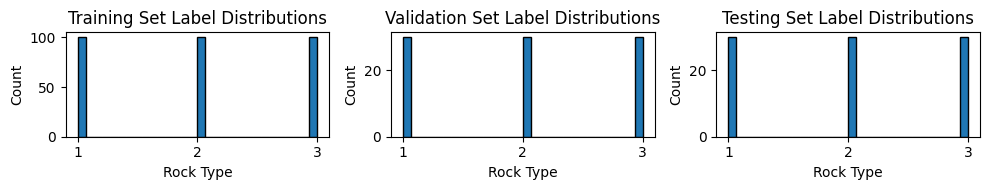

In [119]:
#Now that the data is split, I just want to look at the distributions of each label in each set
#This way, we can know what our model is skewed towards (if it is), and how accurate our val and accuracy predictions are

#create a grid for each plot
fig, axes = plt.subplots(1, 3, figsize=(10, 2))

#plot the histogram distribution of each label for each set (ideally in a perfect world, they should all be equal)
axes[0].hist(y_train, bins=30, edgecolor='black')
axes[0].set_title('Training Set Label Distributions')
axes[0].set_xlabel('Rock Type')
axes[0].set_ylabel('Count')
axes[0].set_xticks([1, 2, 3])

#plot Validation Set
axes[1].hist(y_val, bins=30, edgecolor='black')
axes[1].set_title('Validation Set Label Distributions')
axes[1].set_xlabel('Rock Type')
axes[1].set_ylabel('Count')
axes[1].set_xticks([1, 2, 3])

#plot Testing Set
axes[2].hist(y_test, bins=30, edgecolor='black')
axes[2].set_title('Testing Set Label Distributions')
axes[2].set_xlabel('Rock Type')
axes[2].set_ylabel('Count')
axes[2].set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

<h4>Pt. 3 Analysis:</h4>

<p>
    <strong>Data Splitting:</strong>
    <p>Our data is split into three sets: training, validation, and testing based on the token_number attribute. The token number attribute is then dropped, as we will not need if for training. Secondly, we dropped the Rock type as it is our label to be predicted.<br></p>
    <strong>Label Distributions:</strong>
    <p>Luckily, the distributions of each label in the train, validation, and test set are all exactly equal. This means that upon training, our model should not be as biased towards any one rock type. It also means when the validation and testing sets are used to test error and accuracy, they are actually representative of the model performance on any data instance.</p><br>
    <strong>Instance Counts for Training, Testing, and Validation:</strong>
    <p>
        <strong>Total Training Count:</strong> 300<br>
        <strong>Total Validation Count:</strong> 90<br>
        <strong>Total Testing Count:</strong> 90<br>
    <p>
</p>

<h2>Pt. 4.1: Softmax Regression Model</h2> 

In [120]:
#As we continue, we will make extensize use of each of these function. We just added them here to clean
#up our code and make it a lot more understandable, readable
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#print accuracy, precision, recall,and f1 score
def print_score(y_val, veri_hat):
    print("Accuracy: ", accuracy_score(y_val, veri_hat ))
    print("Precision: ", precision_score(y_val, veri_hat, average='weighted'))
    print("Recall: ", recall_score(y_val, veri_hat, average='weighted'))
    print("F1 Score: ", f1_score(y_val, veri_hat, average='weighted'))

#explore a hyperparameter on a model and print its graph
def explore_parameter(hyperparams, model_choice="SVM", test_name = "parameter" , title = None, true_labels = False):
    #store each model results
    acc_sc, prec_sc, rec_sc, f1_sc = [], [], [], []


    #keep track of the best parameter in the current test_name
    best_val, best_accuracy = 0,0

    #explor each paramter
    for param in hyperparams: 

        if model_choice == "SVM": 
            model = SVC(**param)
        elif model_choice == "sr":
            model = LogisticRegression(**param)
        elif model_choice == "rf":
            model = RandomForestClassifier(**param)

        model.fit(X_train, y_train.ravel())

        veri_hat = model.predict(X_val)

        acc_sc.append(accuracy_score(y_val, veri_hat))
        prec_sc.append(precision_score(y_val, veri_hat, average='weighted'))
        rec_sc.append(recall_score(y_val, veri_hat, average='weighted'))
        f1_sc.append(f1_score(y_val, veri_hat, average='weighted'))

        if (acc_sc[-1] > best_accuracy): 
            best_accuracy = acc_sc[-1]
            best_val = param[test_name]

    n_iterations = range(len(hyperparams))
    plt.figure(figsize=(7, 5))
    plt.plot(n_iterations, acc_sc, label="Accuracy", color="#bb7438", marker="o", linestyle="--")
    plt.plot(n_iterations, prec_sc, label="Precision", color="#7f64b9", marker="s", linestyle="--")
    plt.plot(n_iterations, rec_sc, label="Recall", color="#72ac5c", marker="^", linestyle="--")
    plt.plot(n_iterations, f1_sc, label="F1", color="#b94b75", marker="o", linestyle="--")
    if title != None: plt.title(title)
    plt.xlabel(f"{test_name}")
    plt.ylabel("Score")
    if(true_labels):
        x_ticks = [p[test_name] for p in hyperparams] 
        plt.xticks(ticks= n_iterations, labels = x_ticks)
    else: plt.xticks(n_iterations[::len(hyperparams)//10])
    plt.legend()
    plt.tight_layout()
    plt.show()

    return best_val

In [121]:
from sklearn.linear_model import LogisticRegression
#This is the model with the best parameters
softmax_reg = LogisticRegression(solver="lbfgs", C=11)
softmax_reg.fit(X_train, y_train.ravel())

veri_hat = softmax_reg.predict(X_val)

print_score(y_val, veri_hat)

Accuracy:  0.7666666666666667
Precision:  0.7717171717171717
Recall:  0.7666666666666667
F1 Score:  0.7613349613349614


There is another solver called liblinear, but it does not support multi class classification, that is why it has not been included in the analysis.

Based on the collected information, lbfgs and newton-cg solvers are used for comparitively smaller datasets, while sag and saga are used for comparitively larger datasets.

Another interesting analysis would be to investigate the impact of the regularization on all of these solvers.

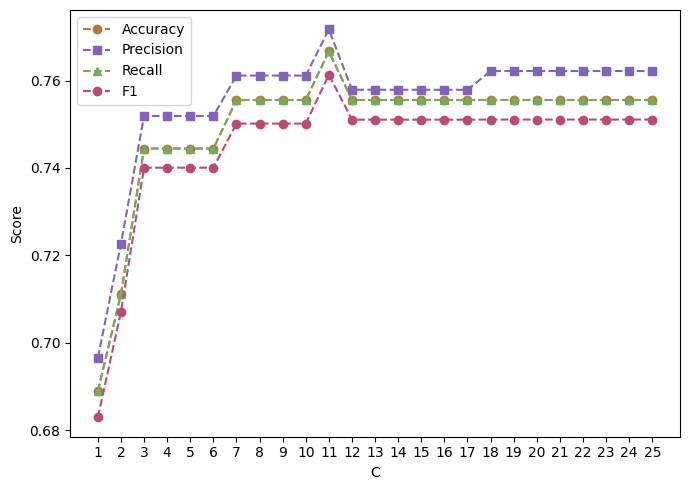

11

In [ ]:
#explore hyperparamteter C
hyperparams = [{'C': i, "solver":"lbfgs"} for i in range(1, 50)]
test_name = "C"
explore_parameter(hyperparams=hyperparams, model_choice = "sr", title = None, test_name=test_name, true_labels=True)

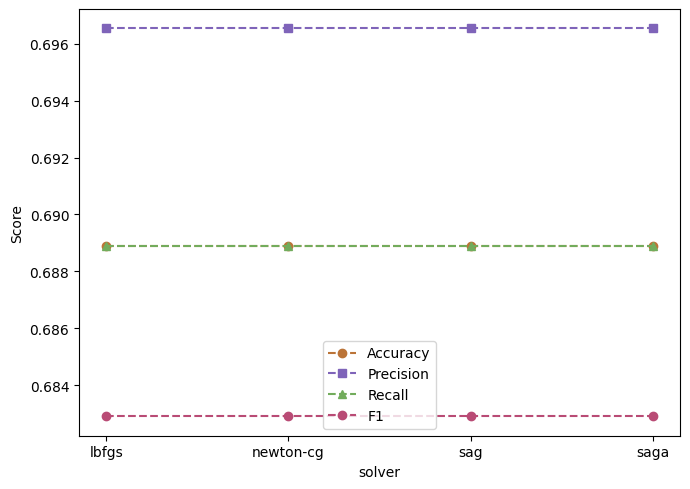

'lbfgs'

In [123]:
# Exploring the hyperparameters: Exploring the solver

solvers = ["lbfgs", "newton-cg", "sag", "saga"]
hyperparams = [{"solver": val} for val in solvers]
test_name = "solver"
explore_parameter(hyperparams=hyperparams, model_choice = "sr", title = None, test_name=test_name, true_labels=True)

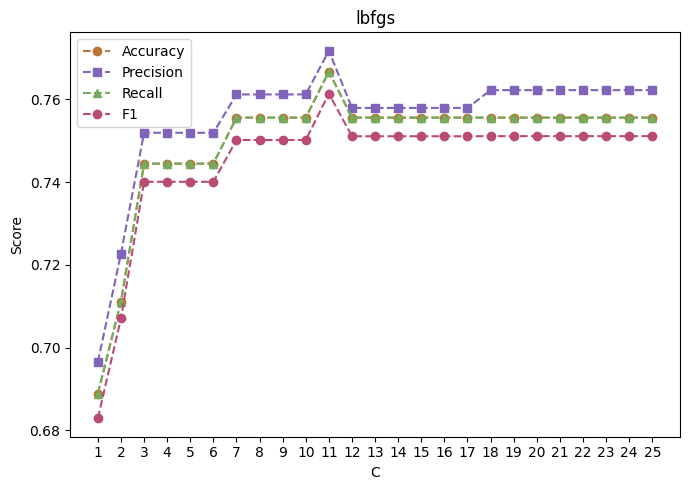

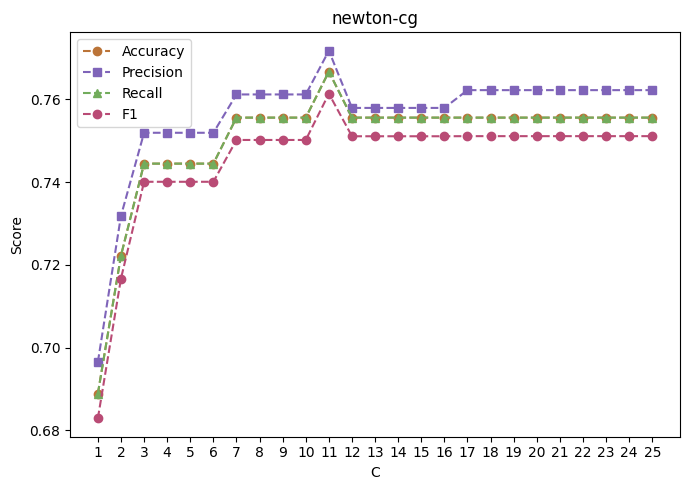

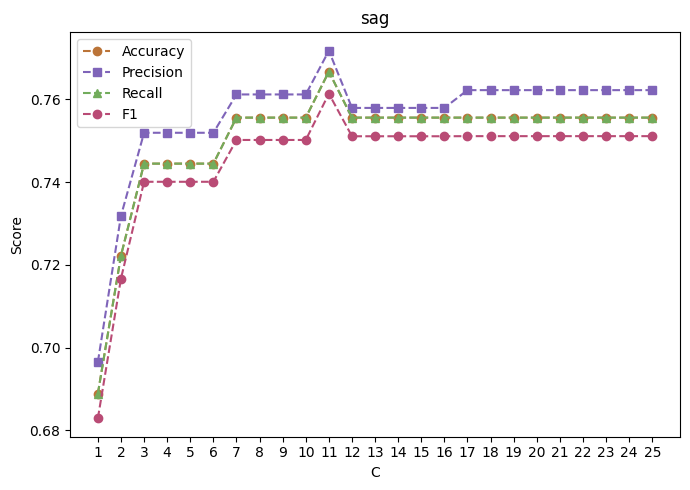

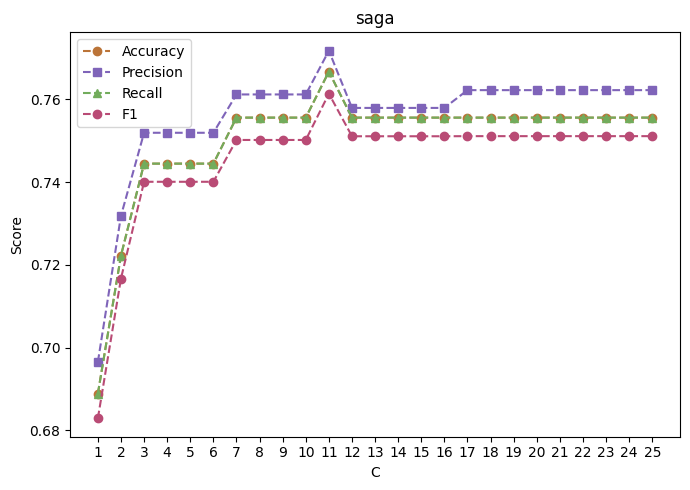

In [124]:
solvers = ["lbfgs", "newton-cg", "sag", "saga"]
C_vals = [i for i in range(1,26)]
hyperparams = [[{"C":val, "solver":solver} for val in C_vals] for solver in solvers]

for model_param in hyperparams:
    test_name = "C"
    title = model_param[0]["solver"]
    explore_parameter(hyperparams=model_param, model_choice = "sr", title=title, test_name=test_name, true_labels=True)

In this case, we see that changing the solver does not impact the output for any of the scores. However, as lbfgs and newton-cg are to be used for smaller datasets and ours is a small dataset, I would choose lbfgs, with C = 11. The final parameter to investigate is the number of iterations.

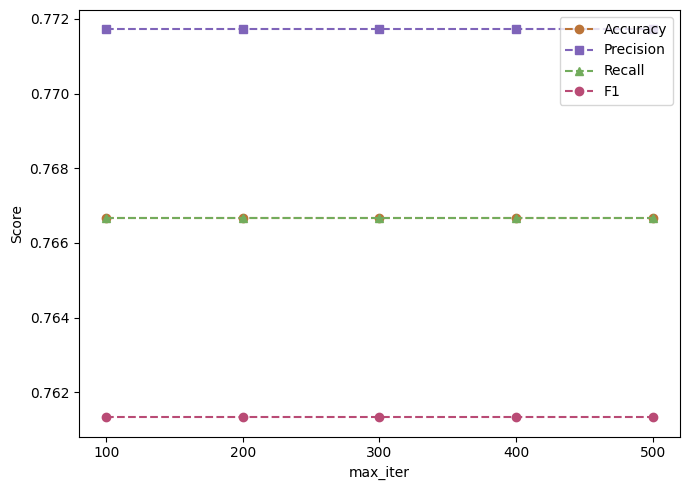

np.int64(100)

In [125]:
n_iterations = np.array([i for i in range(100,600,100)])
c = 11
solver = "lbfgs"
hyperparams = [{"C":11, "solver":solver, "max_iter":n} for n in n_iterations]

test_name = "max_iter"
explore_parameter(hyperparams=hyperparams, model_choice = "sr", title=None, test_name=test_name, true_labels=True)

<h4>Pt. 3.1 Analysis:</h4>

<p>
    <strong>Softmax Regression: Choosing Hyperparameters</strong>
    <p>In order to choose the best hyperparameters, we sequentially chose a hyperparameter, and found its best value for performance based on accuracy. Then, when finding the next hyperparemeter, we included the best hyperparameters that come before it when searching. Though, this gauruntees the best individual hyperparameter values, it does not neccessarily gauruntee us the best <strong>combination</strong> of hyperparameter values. However, it does save a lot of proccessing power as opposed to other methods and still gives us a decent model solution.</p>
    <strong>Hyperparameters Explored (sequentially):</strong>
    <p>C value, solver, max iterations<p><br>
    <strong>Best Model Parameters and Results:</strong><br>
    <p>Best Parameters: C Value = 11, Solver = "lbfgs", Max Iterations: None (no impact)<br>
    <strong>Validation Accuracy:</strong> .77 </p>
</p>

<h2>Pt. 4.2: SVM Model</h2> 

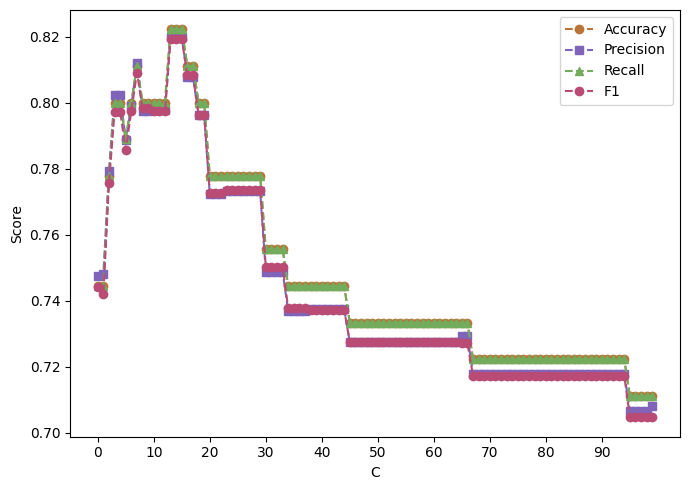

14

In [126]:
#Now we will try an svm model and plot the affects of each hyperparameter
from sklearn.svm import SVC

#first we will be testing with different C values from 1 to 100
hyperparams = [{"C": i} for i in range(1, 101)]
test_name = "C"
explore_parameter(hyperparams=hyperparams, model_choice = "SVM", title=None, test_name=test_name)

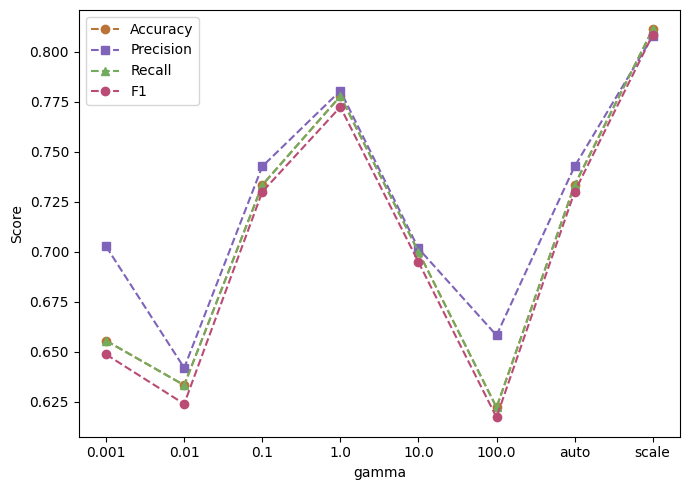

'scale'

In [162]:
#Plotting affect of gamma
gamma_values = []
i = .0001
for _ in range(1,7):
    i = i * 10
    gamma_values.append(i)
hyperparams = [{"gamma": val, "C":14, } for val in gamma_values] +[{"gamma": "auto", "C":17}, {"gamma": "scale", "C":17}]

test_name = "gamma"
explore_parameter(hyperparams=hyperparams, model_choice = "SVM", title=None, test_name=test_name, true_labels=True)

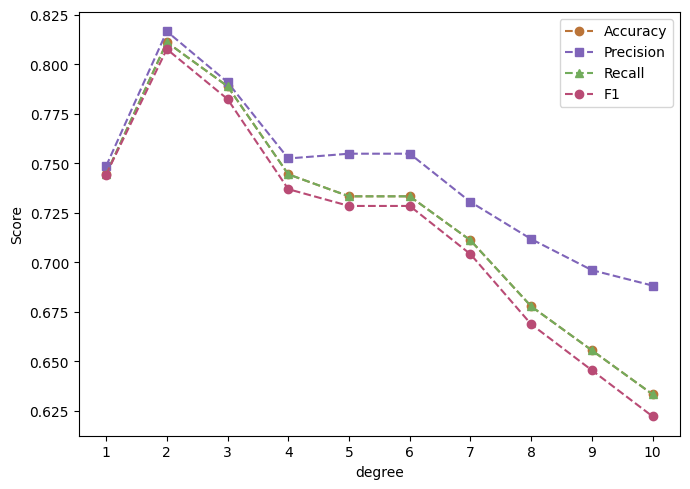

2

In [128]:
#Now We want to try the affect of the polynomial kernal with various degrees
hyperparams = [{"degree": i, "C":14 , "gamma":"scale", "kernel":'poly'} for i in range(1, 11)]
test_name = "degree"
explore_parameter(hyperparams=hyperparams, model_choice = "SVM", title=None, test_name=test_name, true_labels=True)

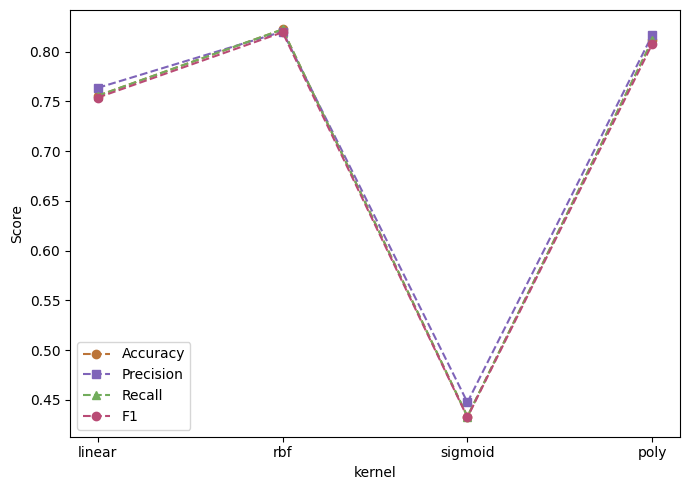

'rbf'

In [129]:
#Now to try other kernals and add the best polynomial kernal for comparison
kernal_values = ['linear','rbf', 'sigmoid']
hyperparams = [{"kernel": val, "C":14, "gamma":"scale"} for val in kernal_values] + [{"degree": 2, "C":14 , "gamma":"scale", "kernel":'poly'}]
test_name = "kernel"
explore_parameter(hyperparams=hyperparams, model_choice = "SVM", title=None, test_name=test_name, true_labels=True)

In [163]:
#Now use the best found parameters and test on t he validation set
best_params_for_each = {'C': 14, "kernel":"rbf", "gamma":"scale"}

print("Best Manually Found Parameters: ",best_params_for_each)
svm_best_params = SVC(**best_params_for_each)

svm_best_params.fit(X_train, y_train.ravel())

veri_hat = svm_best_params.predict(X_val)
#accuracy on validation set
print_score(y_val, veri_hat)

Best Manually Found Parameters:  {'C': 14, 'kernel': 'rbf', 'gamma': 'scale'}
Accuracy:  0.8222222222222222
Precision:  0.8200280112044818
Recall:  0.8222222222222222
F1 Score:  0.8193247126436783


In [164]:
from sklearn.model_selection import GridSearchCV

#We can also use a gridsearch to find a good combination of all of the hyperparameters
#NOTE: This however, does not use our validation set for finding the best model and instead used CV on the train set
#I am doing to see how well it performs compared to our own hyperparameter searching

#for the sake of 
hyperparameters = {
    'C': [0.1, 1, 10, 14, 20,100],                       
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4],                         
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001] 
}

#create the gridsearch operator
grid = GridSearchCV(estimator=SVC(), param_grid=hyperparameters, cv = 3, scoring='accuracy', verbose=2, n_jobs=-1)

#train the model
grid.fit(X_train, y_train.ravel())

#this is the best model so I can do official testing results on it
best_gs_svm_model = grid.best_estimator_

best_gs_svm_model

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


SVC(C=10, degree=1, gamma=1)

In [132]:
#Check this out above ^^ I did not realize it printed this out for you now
#It has never done that for me before :)

#Best parameters found using gridsearch
print(f"Best Gridsearch Model Parameters: {grid.best_params_}")

print(f"Best GridSearch Training Accuracy Score: {grid.best_score_}")

Best Gridsearch Model Parameters: {'C': 10, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Best GridSearch Training Accuracy Score: 0.6666666666666666


<h4>Pt. 4.2 Analysis:</h4>

<p>
    <strong>Support Vector Machine: Choosing Hyperparameters</strong>
    <p>In order to choose the best hyperparameters, we sequentially chose a hyperparameter, and found its best value for performance based on accuracy. Then, when finding the next hyperparemeter, we included the best hyperparameters that come before it when searching. Though, this gauruntees the best individual hyperparameter values, it does not neccessarily gauruntee us the best <strong>combination</strong> of hyperparameter values. <br><br>
    One curious note is that this time, we tried to also use gridsearch. We could not test as many values due to the computation times; however made sure to include the manual hyperparameters we found. Despite this, its accuracy was lower. This is likely do to the cross validation not using our validation set, even though theoretically its accuracy should be the same, if not better then the hyperparamers we manually found.</p>
    <strong>Hyperparameters Explored (sequntially):</strong>
    <p>C value, degree (polynomial kernel), gamma, kernel<p><br>
    <strong>Best Model Parameters and Results:</strong><br>
    <p>Best Parameters: C Value = 14, gamma = "scale", kernel = "rbf"<br>
    <strong>Validation Accuracy:</strong> .82</p>
</p>

<h2>Pt. 4.3: Random Forest Model</h2> 

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [134]:
#loading the random forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=12)

# Fit the regressor with x and y data
rf.fit(X_train, y_train.ravel())

#predicting the random forest on the basis of validation set values
y_pred = rf.predict(X_val)

#accuracy score for the model
accuracy = accuracy_score(y_val, y_pred)
print_score(y_val, y_pred)

Accuracy:  0.7111111111111111
Precision:  0.7164949745594907
Recall:  0.7111111111111111
F1 Score:  0.7120305317026628


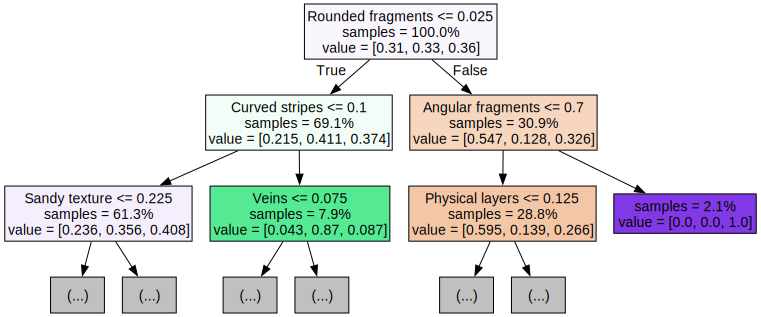

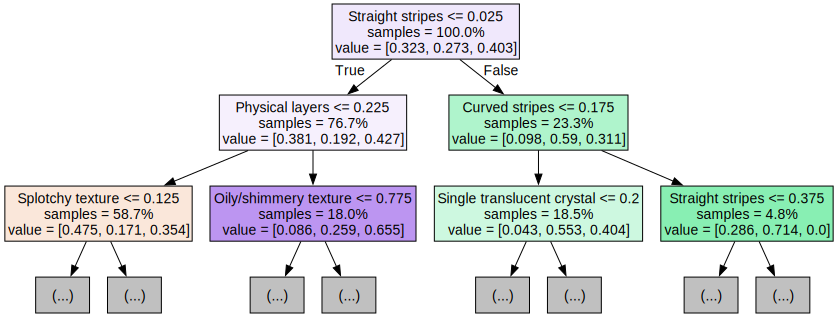

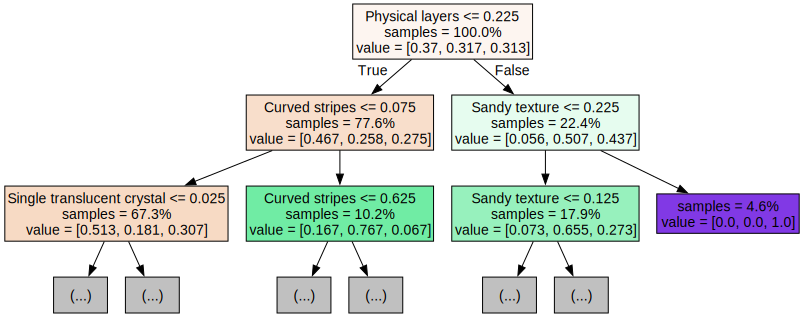

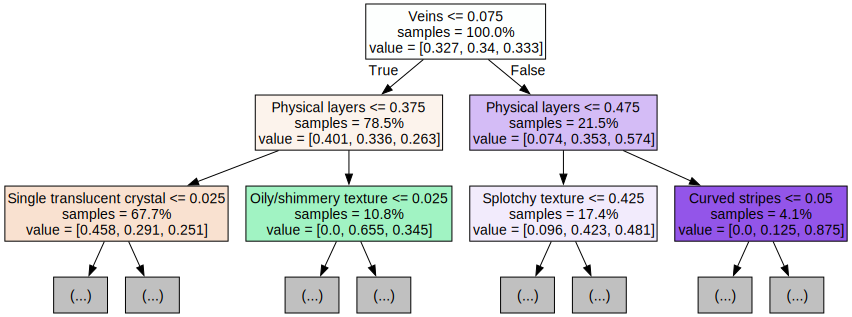

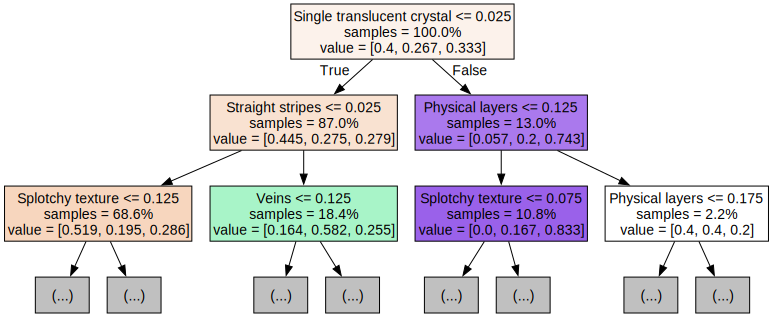

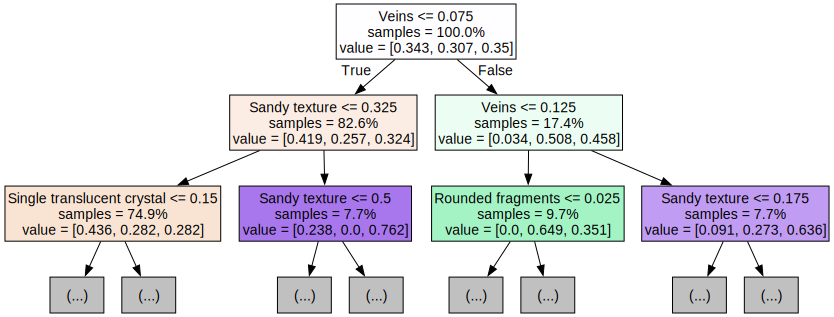

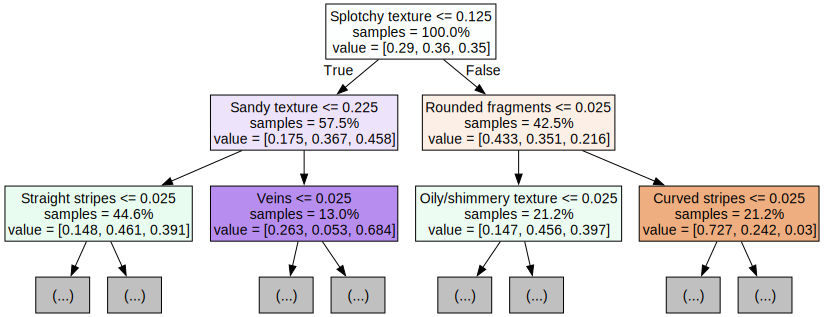

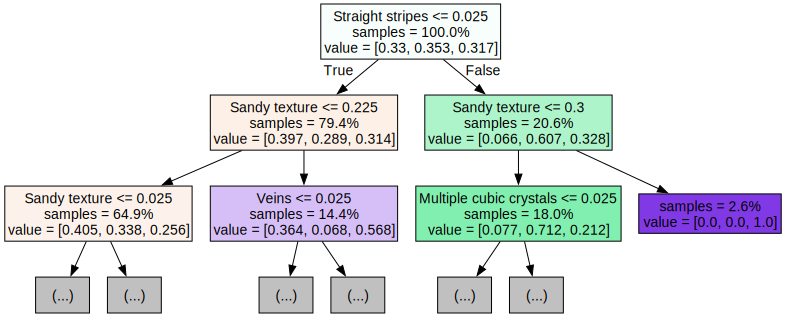

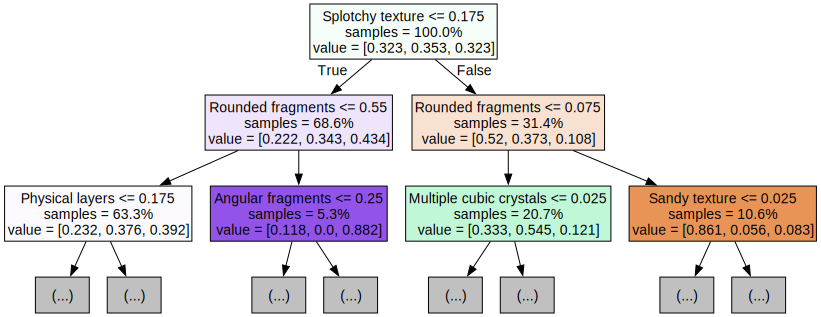

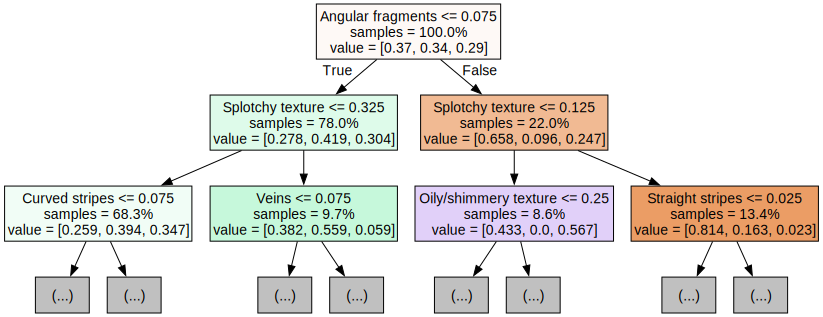

In [135]:
#First 10 tree visualisations - which attribute is used to split the data
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(10):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=columns[1:],
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [136]:
#Here we are using Randomized Search CV to get the best parameters for random forest
#This is more optimized way to calculate best parameters, but may not give the most optimal parameters.

param_dist = {'n_estimators': randint(1,100),
              'max_depth': randint(1,10),
              'min_samples_split': randint(1,40),
              'min_samples_leaf': randint(1,40)}

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=12)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(estimator=rf,
                                 param_distributions  = param_dist,
                                  scoring='accuracy',
                                 cv=3)

# Fit the random search object to the data
rand_search.fit(X_train, y_train.ravel())

#Loading the best model
best_rf_model = rand_search.best_estimator_

best_rf_model

RandomForestClassifier(max_depth=9, min_samples_split=25, n_estimators=80,
                       random_state=12)

In [137]:
#Best parameters and Training accuracy from RandomizedSearchCV
print("Best Random Search Model Parameters: ",rand_search.best_params_)
print("Best Random Search Training Set Score: ",rand_search.best_score_)

Best Random Search Model Parameters:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 25, 'n_estimators': 80}
Best Random Search Training Set Score:  0.6133333333333333


In [138]:
#Now find its performance on the validation set 
best_y_rf = best_rf_model.predict(X_val)
print_score(y_val, best_y_rf)

Accuracy:  0.7666666666666667
Precision:  0.7641065830721004
Recall:  0.7666666666666667
F1 Score:  0.7643817316523336


In [139]:
#We also want to try using gridsearch. This should give us the best parameters; however takes a lot of 
#computational resources. This means we are not actually trying all possible values because it will take too long

param_dist = {'n_estimators': [10,50,100],
              'max_depth': [1,3,5,10,15,20],
              'min_samples_split': [2,3,5,10,20,30,40],
              'min_samples_leaf': [1,3,5,10,20,30,40]}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = GridSearchCV(estimator=rf,
                                 param_grid = param_dist,
                                  scoring='accuracy',
                                 cv=5, n_jobs=-1)

# Fit the random search object to the data
rand_search.fit(X_train, y_train.ravel())

c:\Users\peter\OneDrive\Documents\AML-Assignment2-1\Peter Portion\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5, 10, 20, 30, 40],
                         'min_samples_split': [2, 3, 5, 10, 20, 30, 40],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [140]:
#Best parameters from GridSearchCV
print("Best Model Parameters: ",rand_search.best_params_)
print("Best Train Score: ",rand_search.best_score_)

Best Model Parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Best Train Score:  0.6733333333333333


In [141]:
#Now find the best gridsearch performance on the validation set. Note we resused variable names for convenience
best_rf_model = rand_search.best_estimator_
best_y_rf = best_rf_model.predict(X_val)
print_score(y_val, best_y_rf)

Accuracy:  0.7777777777777778
Precision:  0.7760113449768622
Recall:  0.7777777777777778
F1 Score:  0.7758759845258968


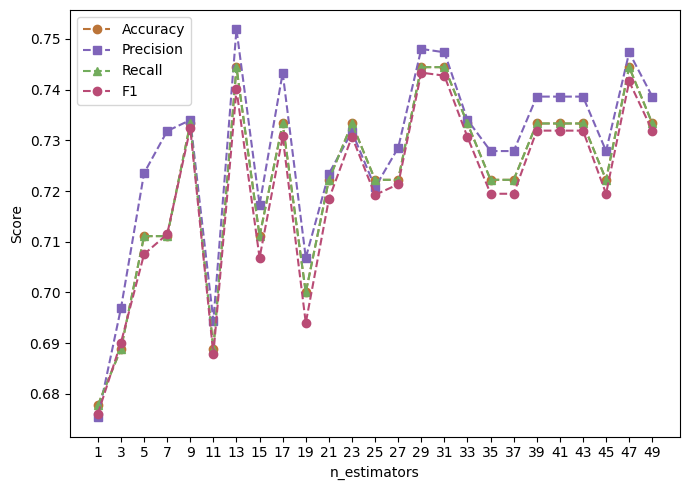

In [142]:
#Now we will test each hyperparameter one by one starting with n_estimaters
hyperparams = [{"n_estimators": i, "random_state":12} for i in range(1,50,2)]
test_name = "n_estimators"
best_estimators = explore_parameter(hyperparams=hyperparams, model_choice = "rf", title = None, test_name=test_name, true_labels=True)

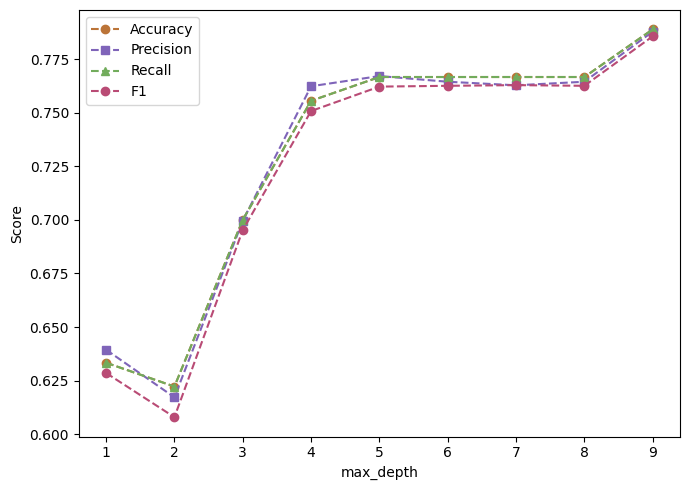

In [143]:
#explor hyperparameter max_depths
hyperparams = [{"max_depth": i, "random_state":12} for i in range(1,10,1)]
test_name = "max_depth"
best_depth = explore_parameter(hyperparams=hyperparams, model_choice = "rf", title = None, test_name=test_name, true_labels=True)

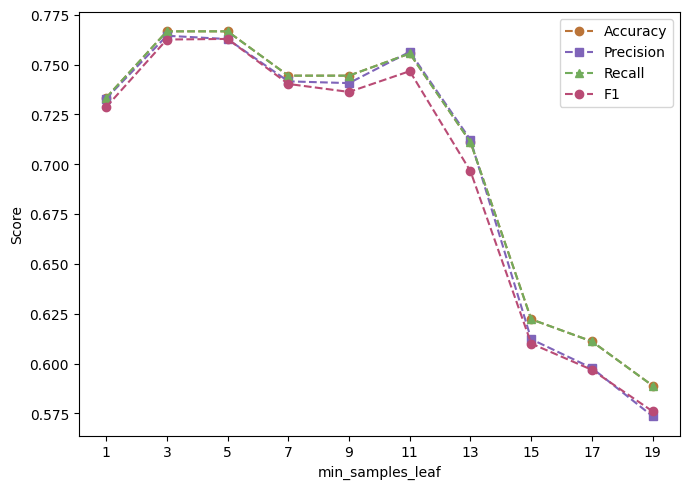

In [144]:
#explore hyperparameter min_samples_leafs
hyperparams = [{"min_samples_leaf": i, "random_state":12} for i in range(1,20,2)]
test_name = "min_samples_leaf"
best_leafs = explore_parameter(hyperparams=hyperparams, model_choice = "rf", title = None, test_name=test_name, true_labels=True)

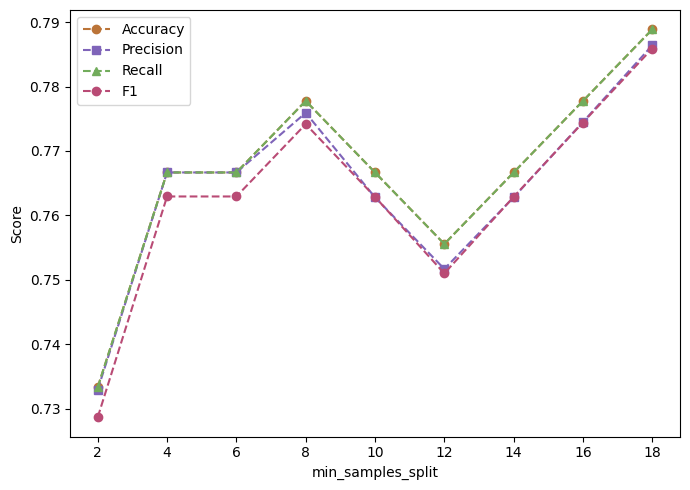

In [145]:
#explore hyperparameter min_samples_split
hyperparams = [{"min_samples_split": i, "random_state":12} for i in range(2,20,2)]
test_name = "min_samples_split"
best_samples = explore_parameter(hyperparams=hyperparams, model_choice = "rf", title = None, test_name=test_name, true_labels=True)

In [167]:
print("n_estimators: ", best_estimators)
print("max depth: ",best_depth)
print("min sample leaves: ",best_leafs)
print("min sample split: ",best_samples)

n_estimators:  13
max depth:  9
min sample leaves:  3
min sample split:  18


In [175]:
from sklearn.metrics import accuracy_score, classification_report


#Now that we have the best parameters we found by manually searching, lets compare it to our randomized search
manual_model = RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=18, n_estimators=13, random_state=12)
random_model = RandomForestClassifier(max_depth=9, min_samples_leaf=7, n_estimators=87,random_state=12)
gridsearch_model = RandomForestClassifier(max_depth = 15, min_samples_leaf = 1, min_samples_split = 3, n_estimators= 50, random_state=12)

#fit the model on the training data
manual_model.fit(X_train, y_train.ravel())
random_model.fit(X_train, y_train.ravel())
gridsearch_model.fit(X_train, y_train.ravel())

#predict the validation set instances
manual_predictions = manual_model.predict(X_val)
random_predictions = random_model.predict(X_val)
grid_predictions = gridsearch_model.predict(X_val)

#get the accuracy and print the results
manual_accuracy = accuracy_score(y_val, manual_predictions)
random_accuracy = accuracy_score(y_val, random_predictions)
gridsearch_accuracy = accuracy_score(y_val, grid_predictions)
print(f"Final Validation Accuracy of Best Manual Parameters: {manual_accuracy}")
print(f"Final Validation Accuracy of Best Random Parameters: {random_accuracy}")
print(f"Final Validation Accuracy of Best Gridsearch Parameters: {gridsearch_accuracy}")

#More general accuracy f1 measure for the better of the two
print("\nClassification Report For Gridsearch Parameters: \n", classification_report(y_val, manual_predictions))

Final Validation Accuracy of Best Manual Parameters: 0.8
Final Validation Accuracy of Best Random Parameters: 0.7666666666666667
Final Validation Accuracy of Best Gridsearch Parameters: 0.7555555555555555

Classification Report For Gridsearch Parameters: 
               precision    recall  f1-score   support

           1       0.85      0.93      0.89        30
           2       0.73      0.73      0.73        30
           3       0.81      0.73      0.77        30

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



<h4>Pt. 4.3 Analysis:</h4>

<p>
    <strong>Random Forest: Choosing Hyperparameters</strong>
    <p>In order to choose the best hyperparameters, for each hyperparameter, we modeled the accuracy given different values. We did each hyperparameter seperately, as opposed to the SVM. This does not gaunreuntee us the best hyperparameter due to the randomized nature of the model; however, it hopefully indicates a generalization that we can use to make a good model. It should also be noted that due to the randomized nature of the random forest, no two models will be alike, so for our results, we use the seed 12 for reproducability for the sake of visualization. We also performed a gridsearch to see how it stacks up also.
    Just like aslt time though, our manual search gave us the best parameters</p>
    <strong>Parameters Explored</strong><p>max_depth, min_samples_leaf, mins_samples_split, n_estimators<p><br>
    <strong>Best Model Parameters and Results:</strong><br>
    <p>Best Parameters: 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 13, random_state=12<br>
    <strong>Validation Accuracy:</strong> .8</p>
</p>

<h2>Pt. 5: Ensemble Model</h2>

In [177]:
#we will be trying three types of Ensemble Models: Hard Voting, Soft Voting, and Stacked.
#we will then compare with our individual models and see which performs best

#First we will implement hard voting using the three models
from sklearn.ensemble import VotingClassifier

#these are the best parameters for all three model (they are already made, but I wanted to add them here also
#for easier viewing)
sr = LogisticRegression(solver="lbfgs", C=11)
svm = SVC(C = 14, kernel = "rbf", gamma = "scale", probability=True)
rf = RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=18, n_estimators=13, random_state=12)
#create the hard voting ensemble
hard_voting_ensemble = VotingClassifier(
    estimators=[('Softmax Regression', sr), ('SVM', svm), ('Random Forest', rf)],
    voting='hard'
)

#train each model on the training data
hard_voting_ensemble.fit(X_train, y_train.ravel())

y_pred = hard_voting_ensemble.predict(X_val)

print_score(y_val, y_pred)

Accuracy:  0.8111111111111111
Precision:  0.8077076180524456
Recall:  0.8111111111111111
F1 Score:  0.8083394407181665


In [ ]:
#Now soft Voting
sr = LogisticRegression(solver="lbfgs", C=11)
svm = SVC(C = 14, kernel = "rbf", gamma = "scale", probability=True)
rf = RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=18, n_estimators=13, random_state=12)

soft_voting_ensemble = VotingClassifier(
    estimators=[('Softmax Regression', sr), ('SVM', svm), ('Random Forest', rf)],
    voting='soft'
)

#train each model on the training data
soft_voting_ensemble.fit(X_train, y_train.ravel())

y_pred = soft_voting_ensemble.predict(X_val)

print_score(y_val, y_pred)

Accuracy:  0.7777777777777778
Precision:  0.7740573152337857
Recall:  0.7777777777777778
F1 Score:  0.7735119047619048


In [179]:
#Now for an ensemble using a lr model
from sklearn.ensemble import StackingClassifier

best_rf_model = LogisticRegression(solver="lbfgs", C=11)
best_svm_model = SVC(C = 14, kernel = "rbf", gamma = "scale", probability=True)
best_sfmx_model = RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=18, n_estimators=13, random_state=12)

stacked = [('random_forest', best_rf_model),('svm', best_svm_model), ('softmax',best_sfmx_model)]

meta = LogisticRegression()

#loading the data
st = StackingClassifier(estimators=stacked, final_estimator=meta)

st.fit(X_train,y_train.ravel())

StackingClassifier(estimators=[('random_forest', LogisticRegression(C=11)),
                               ('svm', SVC(C=14, probability=True)),
                               ('softmax',
                                RandomForestClassifier(max_depth=9,
                                                       min_samples_leaf=3,
                                                       min_samples_split=18,
                                                       n_estimators=13,
                                                       random_state=12))],
                   final_estimator=LogisticRegression())

The second Logistic Regression acts as the meta-classifier. It takes the predictions (or probabilities) from all base models (SVM, Logistic Regression, and Random Forest) and combines them to make the final prediction. Logistic Regression is often chosen as the meta-classifier because it’s computationally efficient and works well in combining multiple prediction probabilities into one final output.

In [180]:
st_pred = st.predict(X_val)

print_score(y_val, st_pred)
print("\nClassification Report:\n", classification_report(y_val, st_pred))

Accuracy:  0.7777777777777778
Precision:  0.7751393866985264
Recall:  0.7777777777777778
F1 Score:  0.7754305559421204

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.93      0.90        30
           2       0.71      0.73      0.72        30
           3       0.74      0.67      0.70        30

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



Accuracy SVM: 0.8222222222222222
Accuracy Softmax: 0.8
Accuracy Random Forest: 0.7666666666666667
Accuracy Hard Voting Model: 0.8111111111111111
Accuracy Soft Voting model: 0.7777777777777778
Accuracy Stacked model: 0.7888888888888889


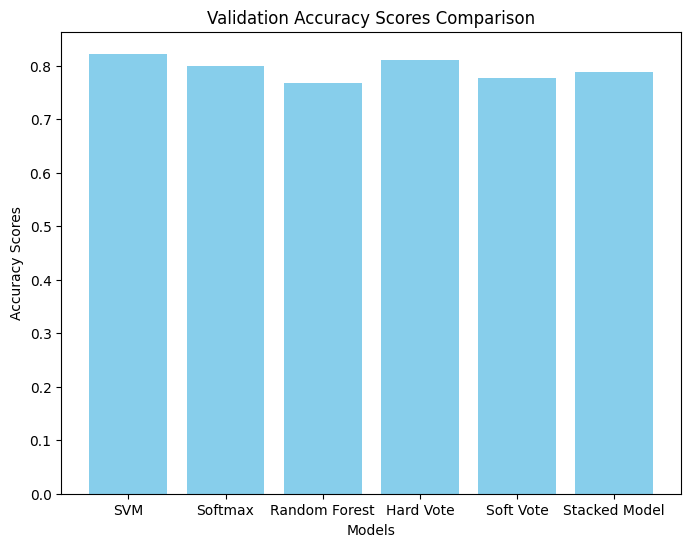

In [181]:
#Per the instructions, we will compare them all on the validation set to choose the best

#comparison of the models

import matplotlib.pyplot as plt
accuracy_scores_all=[]

best_svm_model.fit(X_train,y_train.ravel())
y_pred_svm= best_svm_model.predict(X_val)
accuracy_scores_all.append(accuracy_score(y_val, y_pred_svm))
print("Accuracy SVM:", accuracy_score(y_val, y_pred_svm))

best_sfmx_model.fit(X_train,y_train.ravel())
y_pred_sfmx = best_sfmx_model.predict(X_val)
accuracy_scores_all.append(accuracy_score(y_val, y_pred_sfmx))
print("Accuracy Softmax:", accuracy_score(y_val, y_pred_sfmx))

best_rf_model.fit(X_train,y_train.ravel())
y_pred_rf = best_rf_model.predict(X_val)
accuracy_scores_all.append(accuracy_score(y_val, y_pred_rf))
print("Accuracy Random Forest:", accuracy_score(y_val, y_pred_rf))

hard_voting_ensemble.fit(X_train,y_train.ravel())
y_pred_hard=hard_voting_ensemble.predict(X_val)
accuracy_scores_all.append(accuracy_score(y_val, y_pred_hard))
print("Accuracy Hard Voting Model:", accuracy_score(y_val, y_pred_hard))

soft_voting_ensemble.fit(X_train,y_train.ravel())
y_pred_soft=soft_voting_ensemble.predict(X_val)
accuracy_scores_all.append(accuracy_score(y_val, y_pred_soft))
print("Accuracy Soft Voting model:", accuracy_score(y_val, y_pred_soft))

st.fit(X_train,y_train.ravel())
y_pred_st=st.predict(X_val)
accuracy_scores_all.append(accuracy_score(y_val, y_pred_st))
print("Accuracy Stacked model:", accuracy_score(y_val, y_pred_st))

models = ['SVM', 'Softmax', 'Random Forest', 'Hard Vote', 'Soft Vote', 'Stacked Model']


# Create the bar plot
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.bar(models, accuracy_scores_all, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Validation Accuracy Scores Comparison')

# Display the plot
plt.show()

Accuracy SVM: 0.7444444444444445
Accuracy Softmax: 0.6666666666666666
Accuracy Random Forest: 0.7
Accuracy Hard Voting Model: 0.7555555555555555
Accuracy Soft Voting model: 0.7444444444444445
Accuracy Stacked model: 0.7333333333333333


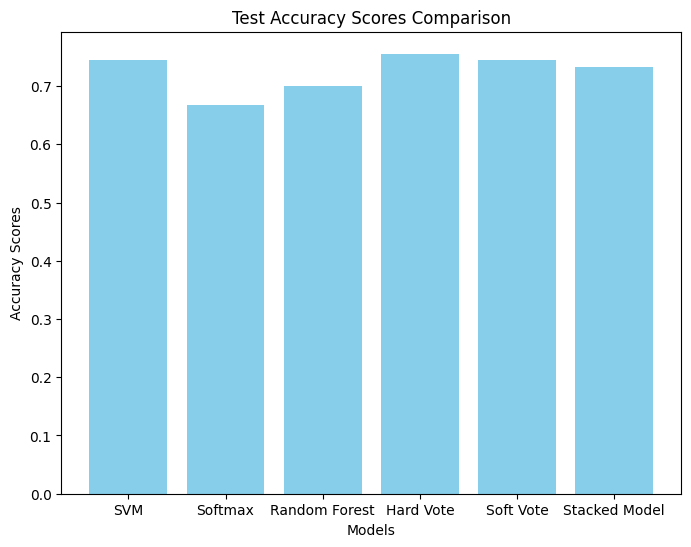

In [182]:
#Just for fun, we also wanted to see which performed better on the actual test set
import matplotlib.pyplot as plt
accuracy_scores_all=[]

best_svm_model.fit(X_train,y_train.ravel())
y_pred_svm= best_svm_model.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_svm))
print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))

best_sfmx_model.fit(X_train,y_train.ravel())
y_pred_sfmx = best_sfmx_model.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_sfmx))
print("Accuracy Softmax:", accuracy_score(y_test, y_pred_sfmx))

best_rf_model.fit(X_train,y_train.ravel())
y_pred_rf = best_rf_model.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_rf))
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))

hard_voting_ensemble.fit(X_train,y_train.ravel())
y_pred_hard=hard_voting_ensemble.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_hard))
print("Accuracy Hard Voting Model:", accuracy_score(y_test, y_pred_hard))

soft_voting_ensemble.fit(X_train,y_train.ravel())
y_pred_soft=soft_voting_ensemble.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_soft))
print("Accuracy Soft Voting model:", accuracy_score(y_test, y_pred_soft))

st.fit(X_train,y_train.ravel())
y_pred_st=st.predict(X_test)
accuracy_scores_all.append(accuracy_score(y_test, y_pred_st))
print("Accuracy Stacked model:", accuracy_score(y_test, y_pred_st))

models = ['SVM', 'Softmax', 'Random Forest', 'Hard Vote', 'Soft Vote', 'Stacked Model']


# Create the bar plot
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.bar(models, accuracy_scores_all, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Test Accuracy Scores Comparison')

# Display the plot
plt.show()

In [183]:
#per the isntructions, we will choose the best model from the validation (not the testing)

#SVM is our best model, so lets output all of its scores
y_pred_svm= best_svm_model.predict(X_test)

print("----------------- BEST MODEL: SVM -----------------")
print_score(y_test, y_pred_svm)

----------------- BEST MODEL: SVM -----------------
Accuracy:  0.7444444444444445
Precision:  0.7662166168108443
Recall:  0.7444444444444445
F1 Score:  0.7437051323261544


<h4>Pt. 5 Analysis:</h4>

<p>
    <strong>Ensemble Models</strong>
    <p>We chose three different Ensemble methods to try: Soft Voting, Hard Voting, and Stack with Logistic Regression. Below are the Accuracues of each on the validation set. We also included the accuracies of each individual model just to compare</p>
    <strong>Hard Voting Ensemble: </strong>.811<br>
    <strong>Soft Voting Ensemble: </strong>.778<br>
    <strong>Stacking Ensemble: </strong>.789<br>
    <strong>Softmax Regression: </strong>.8<br>
    <strong>Support Vector Machine: </strong>.822<br>
    <strong>Randomized Forest: </strong>.767<br><br>
    <strong>Findings: </strong><br>
    <p>Of all of our Models, the SVM performed best on the validation set with .822 accuracy. When tested on the testing set, it performed with .744 accuracy, a significant drop. This could be due to overfitting of the model.<br><br>
     Notably, all of our ensemble methods did end up beating the other two solo classifiers - softmax regression and random forest</p>
</p>

<h2>Pt. 6: Humans vs. Ensemble</h2>

In [184]:
#we want find how well humans performed trying to classify the rocks

#get the human predictions for each rock
hdata = r".\Dataset\trialData.csv"
#hdata = r"./Dataset/trialData.csv"
human = pd.read_csv(hdata,usecols = ["subid","block","trial","rocknumber","category","catresponse","cat_correct"])
human = human[human["rocknumber"].between(1,480)]

#split into the training and testing sets for humans
human_train = human[human["block"]<=3]
human_train.reset_index(drop = True, inplace = True)
human_test = human[human["block"]>3]
human_test.reset_index(drop = True, inplace = True)

#show the head of the dataset for visuals
human.head()

,subid,block,trial,rocknumber,category,catresponse,cat_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Metamorphic,0
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Igneous,0
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Sedimentary,0
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Metamorphic,0
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Sedimentary,0


In [185]:
#use to find the accuracy of humans predictions for each rock
def find_accuracy(dataset):
    dataset = dataset.copy()
    dataset.reset_index(drop = True, inplace = True)

    correct_response = 0
    for i in range(len(dataset)):
        if dataset["cat_correct"][i] == 1:
            correct_response += 1
    
    return correct_response/len(dataset)

#how well did the humans perform overall on the rock sets
print("Human train accuracy:", find_accuracy(human_train))
print("Human test accuracy:", find_accuracy(human_test))

Human train accuracy: 0.5599349490660221
Human test accuracy: 0.5984143924378716


In [186]:
#get the human accuracies for each rock
human_accuracies = {}
for j in range(1,481):
    try:
       rock = human[human["rocknumber"] == j]
    except KeyError:
        human_accuracies[j] = -1
    else:
        human_rock_accuracy = find_accuracy(rock)
        human_accuracies[j]= human_rock_accuracy

#see what we are working with
print(f"Human Accuracy 1: {human_accuracies[1]}")
print(f"Human Accuracy 2: {human_accuracies[2]}")
print(f"Human Accuracy 3: {human_accuracies[3]}")
print(f"Human Accuracy 4: {human_accuracies[4]}")
print(f"Human Accuracy 5: {human_accuracies[5]}")

print(f"Total Accuracies/Rocks: {len(list(human_accuracies))}")

Human Accuracy 1: 0.7469512195121951
Human Accuracy 2: 0.7195121951219512
Human Accuracy 3: 0.45121951219512196
Human Accuracy 4: 0.5
Human Accuracy 5: 0.5121951219512195
Total Accuracies/Rocks: 480


In [187]:
#Now we want to use our best model to predict each rock, and find the predicted probabilties of each rock
#this will allow us to compare how well it performed to humans
best_model = SVC(C = 14, kernel = "rbf", gamma = "scale", probability=True)
best_model.fit(X_train, y_train.ravel())

class_probabilities = best_model.predict_proba(df_features)
predicted_classes = best_model.predict(df_features)
predicted_class_probabilities = [probs[pred-1] for probs, pred in zip(class_probabilities, predicted_classes)]

In [188]:
#Now that we have our best model and predictions, we can compare its accuracy to the humans
#before performing a more detailed analyses
predicted_test_set = best_model.predict(X_test)
best_model_accuracy = accuracy_score(y_test, predicted_test_set)

print(f"Model Test Accuracy: {best_model_accuracy}")
print(f"Human Test Accuracy: {find_accuracy(human_test)}")

Model Test Accuracy: 0.7444444444444445
Human Test Accuracy: 0.5984143924378716


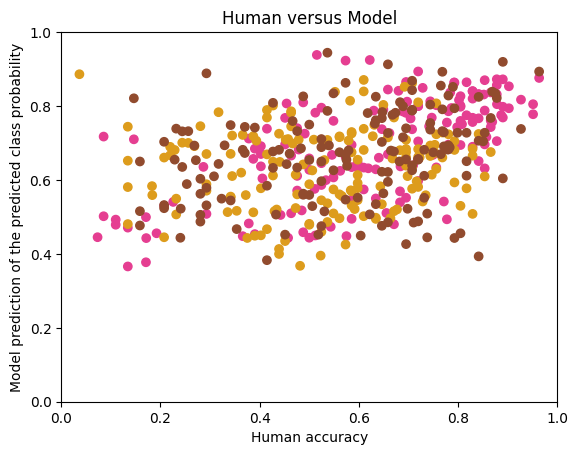

In [189]:
#graph 
color = []
for i in df_labels[1]:
    if i == 1:
        color.append("#e53e91")
    elif i == 2:
        color.append("#dd9c1c")
    elif i == 3:
        color.append("#914b2e")

plt.figure()
plt.scatter(list(human_accuracies.values()),predicted_class_probabilities, c = color)
plt.xlabel("Human accuracy")
plt.ylabel("Model prediction of the predicted class probability")
plt.title("Human versus Model")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

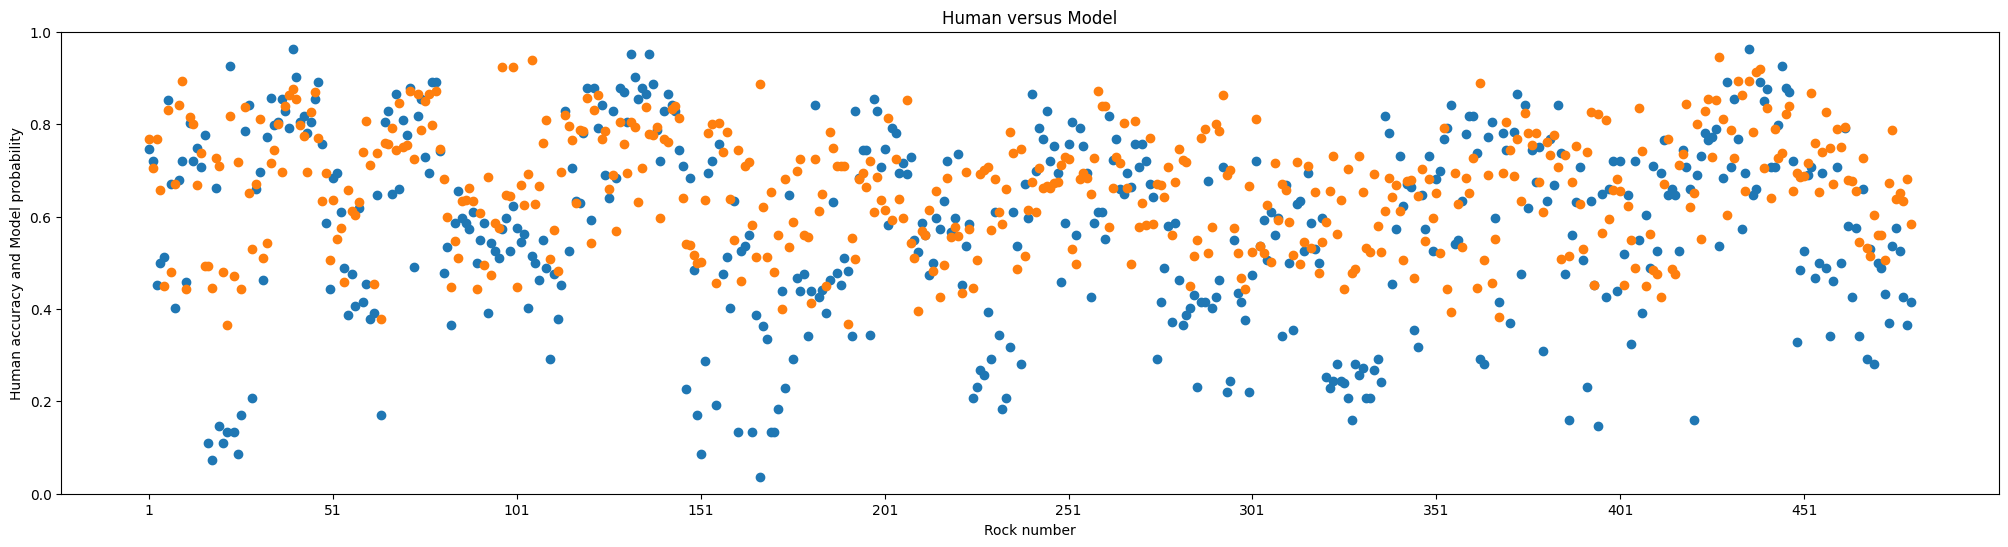

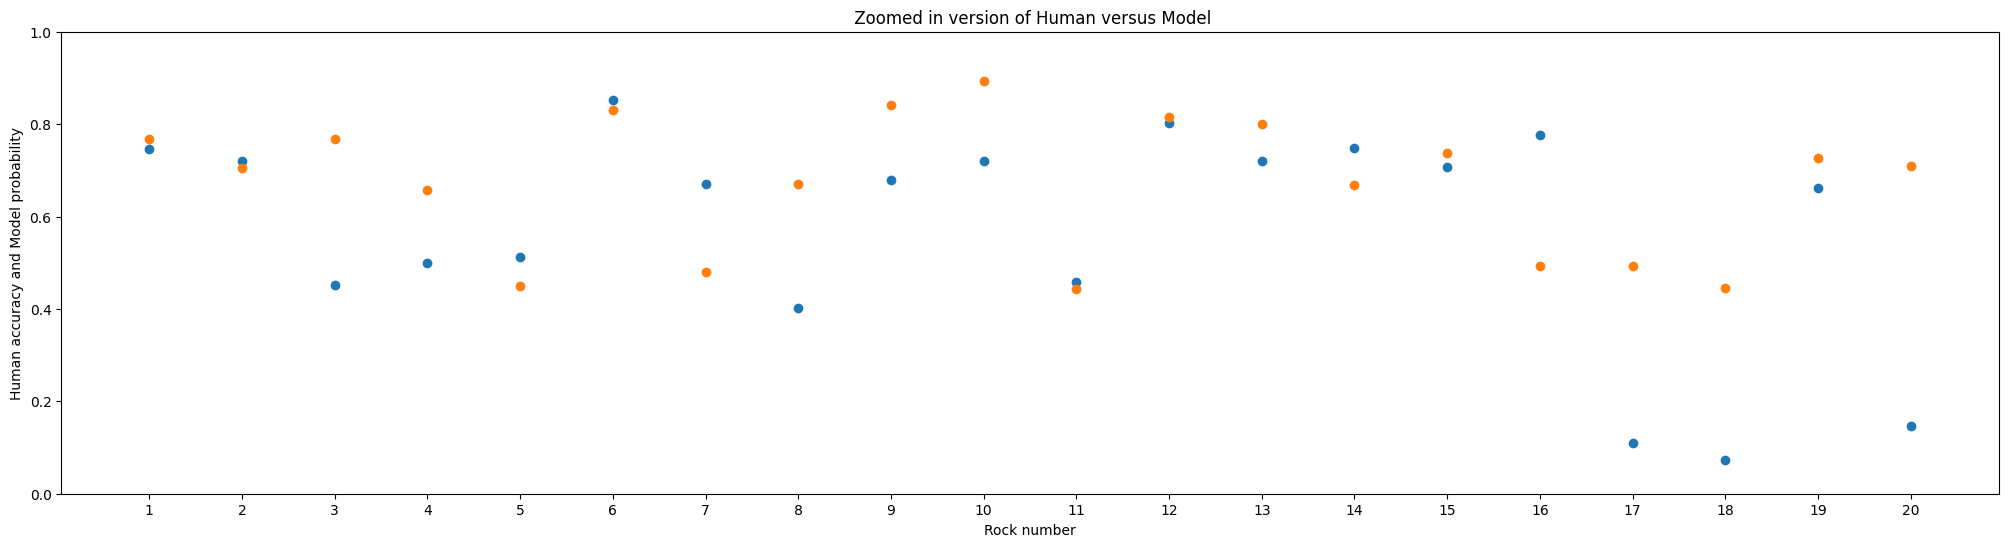

In [190]:
plt.figure(figsize=(25,6))
plt.scatter(list(human_accuracies.keys()),list(human_accuracies.values()), label = "Human accuracy")
plt.scatter(list(human_accuracies.keys()),predicted_class_probabilities, label = "Model probabilities")
plt.xlabel("Rock number")
plt.ylabel("Human accuracy and Model probability")
plt.title("Human versus Model")
plt.ylim(0,1)
plt.xticks([i for i in range(1,481,50)],[i for i in range(1,481,50)])
plt.show()

plt.figure(figsize=(25,6))
plt.scatter(list(human_accuracies.keys())[:20],list(human_accuracies.values())[:20], label = "Human accuracy")
plt.scatter(list(human_accuracies.keys())[:20],predicted_class_probabilities[:20], label = "Model probabilities")
plt.xlabel("Rock number")
plt.ylabel("Human accuracy and Model probability")
plt.title(" Zoomed in version of Human versus Model")
plt.ylim(0,1)
plt.xticks([i for i in range(1,21)],[i for i in range(1,21)])
plt.show()

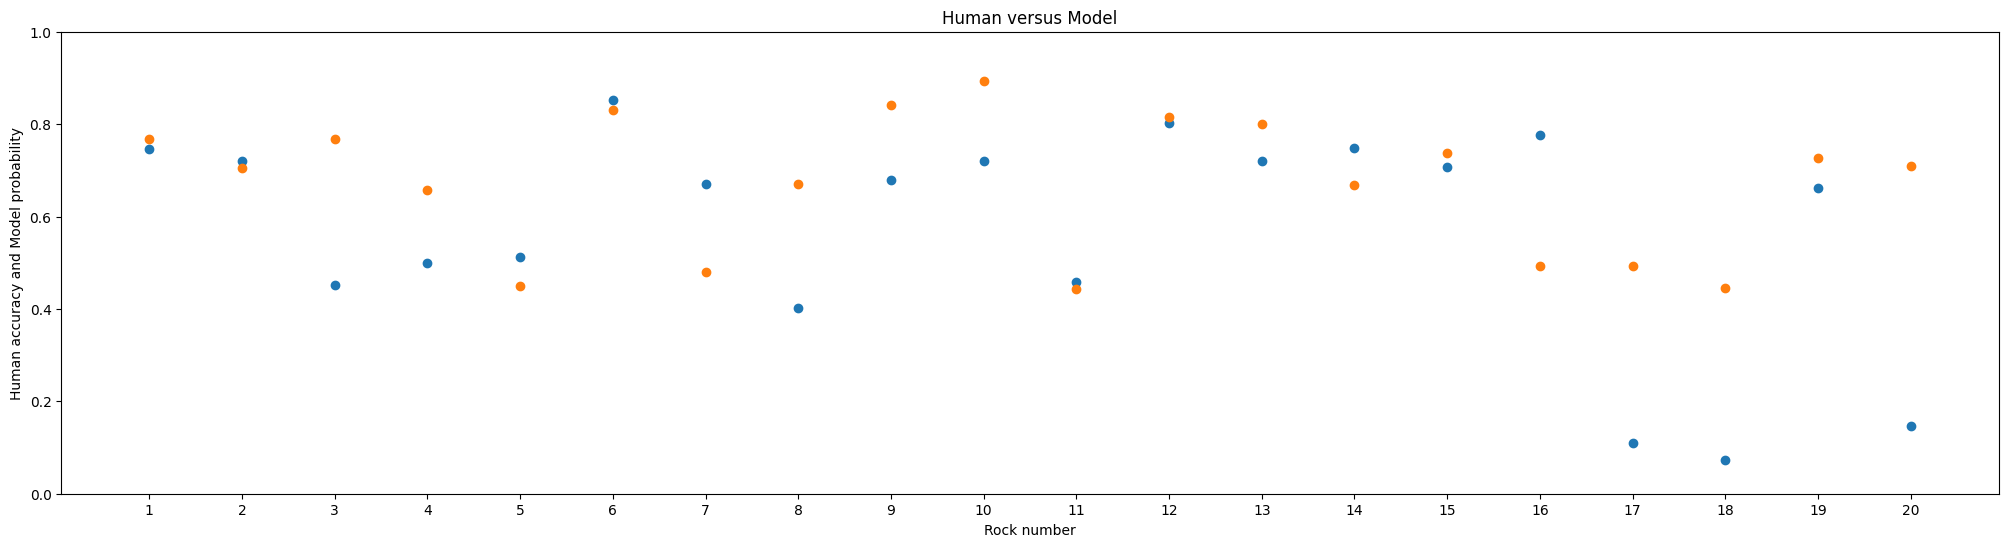

In [ ]:
#This plot shows the difference between the model predictions probability (orange) and the human predictions (blue)
#for each of the first 10 rocks. 

plt.figure(figsize=(25,6))
plt.scatter(list(human_accuracies.keys())[:20],list(human_accuracies.values())[:20], label = "Human accuracy")
plt.scatter(list(human_accuracies.keys())[:20],predicted_class_probabilities[:20], label = "Model probabilities")
plt.xlabel("Rock number")
plt.ylabel("Human accuracy and Model probability")
plt.title("Human versus Model")
plt.ylim(0,1)
plt.xticks([i for i in range(1,21)],[i for i in range(1,21)])
plt.show()

<h3>Pt. 6 Analysis:</h3>
<strong>Humans vs. Machines</strong>

<p>For the first graph, we ould say that the model constantly works better had the scatter plot been above the y=x line. However, it is not so. Therefore we can only say that the model works better for the rocks where the human accuracy is low. For the rock types whcich have high accuracy on human predictions, the model works comparitively, and sometimes worse tha human.</p>

<p> For the second graph we pot the rock_number on x axis and each rock number had two y values, the model probability and secondly, human accuracy. This is much better visible in the zoomed in versin of the graph. The aim of this was to help identify the rock types where the model performs better, as this information is not available from the previous graph.</p>